<a href="https://colab.research.google.com/github/suchitra2020180/RS_GIS_Python/blob/main/Data_visualisation_Python_Part3_Assignment_ColoredRivers_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Overview

Your assignment is to create a colorized river basin map for your country using the [HydroRIVERS](https://www.hydrosheds.org/products/hydrorivers) data.

This notebook contains code to download and pre-process the data. Your task is to plot the rivers using Matplotlib and achieve a unique style shown below.

#Steps followed:
1. Download River basin data from HydroRIVERS dataset and countries dataset from NaturalEarth

#Setup and Download

In [11]:
!pip install rioxarray

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
import xarray as xr
import rioxarray as rxr
import zipfile

In [14]:
data_folder='Color_RiverBasin_Map'

main_path='/content/drive/MyDrive/Jobs_Projects_Doc/Spatial_Analysis_Python/data'
data_folder_path=os.path.join(main_path,data_folder)
output_folder_path='/content/drive/MyDrive/Jobs_Projects_Doc/Spatial_Analysis_Python/output'

if not os.path.exists(data_folder_path):
  os.mkdir(data_folder_path)
if not os.path.exists(output_folder_path):
  os.mkdir(output_folder_path)

In [8]:
def download(url):
  filename=os.path.join(data_folder_path,os.path.basename(url))
  if not os.path.exists(filename):
    with requests.get(url, stream=True, allow_redirects=True) as r:
      with open(filename,'wb') as f:
        for chunk in r.iter_content(chunk_size=8192):
          f.write(chunk)
    print('Downloaded:',filename)

In [15]:
#data_url='https://github.com/spatialthoughts/python-dataviz-web/releases/download/hydrosheds/hydrorivers_100.gpkg'

main_url = 'https://github.com/spatialthoughts/python-dataviz-web/releases/download/'

# This is a subset of the main HydroRivers dataset of all
# rivers having `UPLAND_SKM` value  greater than 100 sq. km.

hydrorivers_url= main_url + 'hydrosheds/'
hydrorivers_file='hydrorivers_100.gpkg'

countries_url = main_url + 'naturalearth/'
countries_file = 'ne_10m_admin_0_countries_ind.zip'

#Download hydrorivers data
download(hydrorivers_url + hydrorivers_file)
#Downloadcountries_file data
download(countries_url + countries_file)

#Data Processing

#Work on countries_file

Extract the zip file data into a file

In [23]:
zip_file='ne_10m_admin_0_countries_ind.zip'
zip_file_path=os.path.join(data_folder_path,zip_file)
print('Zip file path:',zip_file_path)
file='ne_10m_admin_0_countries_ind'
extract_to_path=os.path.join(data_folder_path,file)
#data_extracted=os.path.join(data_folder_path,os.path.basename(url)+'extracted')
# Extract the ZIP file
with zipfile.ZipFile(zip_file_path,'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print('Files extracted to:', extract_to_path)

Zip file path: /content/drive/MyDrive/Jobs_Projects_Doc/Spatial_Analysis_Python/data/Color_RiverBasin_Map/ne_10m_admin_0_countries_ind.zip
Files extracted to: /content/drive/MyDrive/Jobs_Projects_Doc/Spatial_Analysis_Python/data/Color_RiverBasin_Map/ne_10m_admin_0_countries_ind


In [24]:
countries_file_path=os.path.join(data_folder_path,file)
countries_file

'ne_10m_admin_0_countries_ind.zip'

In [26]:
countries_file=extract_to_path

In [33]:
gdf=gpd.read_file(countries_file)
gdf

,ADM0_A3_IN,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,IDN,Admin-0 country,0,2,Indonesia,IDN,0,2,Sovereign country,1,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,MYS,Admin-0 country,0,3,Malaysia,MYS,0,2,Sovereign country,1,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,CHL,Admin-0 country,0,2,Chile,CHL,0,2,Sovereign country,1,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,BOL,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,1,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,PER,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,1,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,PGA,Admin-0 country,6,6,Spratly Islands,PGA,0,2,Indeterminate,1,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((115.3672 10.23749, 115.36598 1..."
244,CLP,Admin-0 country,6,5,France,FR1,1,2,Dependency,1,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-109.21203 10.30268, -109.21036 10.2..."
245,MAC,Admin-0 country,0,4,China,CH1,1,2,Country,1,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((113.5586 22.16303, 113.56943 2..."
246,ATC,Admin-0 country,6,5,Australia,AU1,1,2,Dependency,1,...,None,None,None,None,None,None,None,None,None,"POLYGON ((123.59702 -12.42832, 123.59775 -12.4..."


In [34]:
gdf.columns

Index(['ADM0_A3_IN', 'featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT',
       'SOV_A3', 'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)

For the assignment, you need to pick the country for which you want to create the map. We can print a list of values from the SOVEREIGNT column of country_gdf GeoDataFrame using country_gdf.SOVEREIGNT.values to know the names of all countries.

In [35]:
gdf['SOVEREIGNT'].value_counts()

,count
SOVEREIGNT,
United Kingdom,18
France,9
United States of America,7
Australia,6
Netherlands,4
...,...
Greece,1
Zambia,1
Sierra Leone,1


Displaying countries in dataframe

In [37]:
list(gdf['SOVEREIGNT'].unique())

['Indonesia',
 'Malaysia',
 'Chile',
 'Bolivia',
 'Peru',
 'Argentina',
 'United Kingdom',
 'Cyprus',
 'India',
 'Israel',
 'Lebanon',
 'Ethiopia',
 'South Sudan',
 'Somalia',
 'Kenya',
 'Malawi',
 'United Republic of Tanzania',
 'China',
 'Syria',
 'France',
 'Suriname',
 'Guyana',
 'South Korea',
 'North Korea',
 'Morocco',
 'Costa Rica',
 'Nicaragua',
 'Republic of the Congo',
 'Democratic Republic of the Congo',
 'Bhutan',
 'Ukraine',
 'Belarus',
 'Namibia',
 'South Africa',
 'Netherlands',
 'Oman',
 'Uzbekistan',
 'Kazakhstan',
 'Tajikistan',
 'Lithuania',
 'Brazil',
 'Uruguay',
 'Mongolia',
 'Russia',
 'Czechia',
 'Germany',
 'Estonia',
 'Latvia',
 'Norway',
 'Sweden',
 'Finland',
 'Vietnam',
 'Cambodia',
 'Luxembourg',
 'United Arab Emirates',
 'Belgium',
 'Georgia',
 'North Macedonia',
 'Albania',
 'Azerbaijan',
 'Republic of Serbia',
 'Turkey',
 'Spain',
 'Laos',
 'Kyrgyzstan',
 'Armenia',
 'Denmark',
 'Libya',
 'Tunisia',
 'Romania',
 'Hungary',
 'Slovakia',
 'Poland',
 'Irel

Select India

In [56]:
selected_country='India'
India_gdf=gdf[gdf['SOVEREIGNT']==selected_country]
India_gdf

,ADM0_A3_IN,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
8,IND,Admin-0 country,0,2,India,IND,0,2,Sovereign country,1,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((78.91769 33.38626, 78.96499 33..."


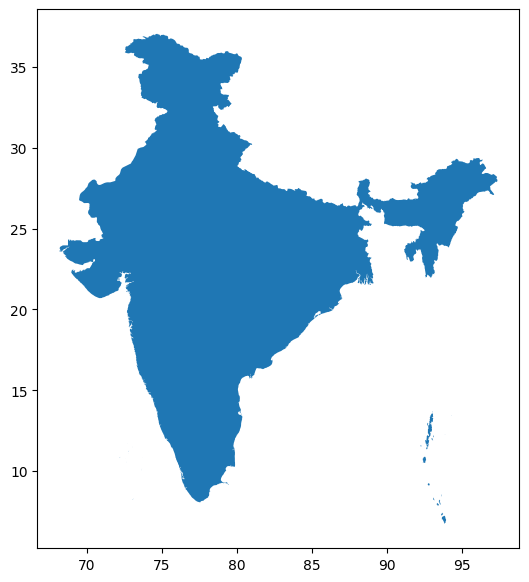

In [39]:
fig,ax=plt.subplots(1,1)
fig.set_size_inches(15,7)
India_gdf.plot(ax=ax)
plt.show()

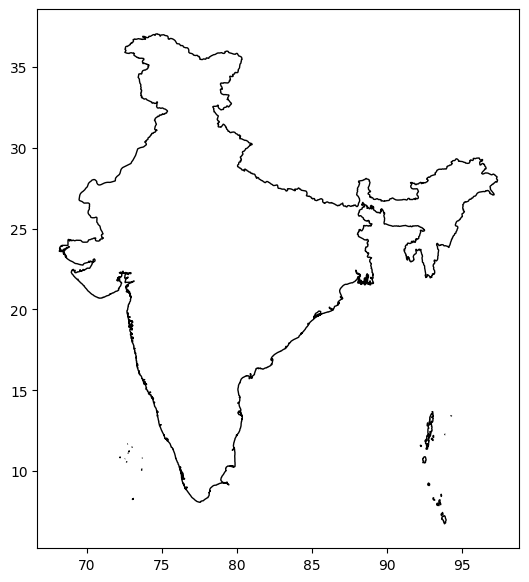

In [40]:
fig,ax=plt.subplots(1,1)
fig.set_size_inches(15,7)
India_gdf.plot(ax=ax, facecolor='None',edgecolor='black')
plt.show()

Apply filters to select the country feature. We use an additional filter TYPE != 'Dependency' to exclude overseas territories. You may have to adjust the filter to get the correct country polygon.

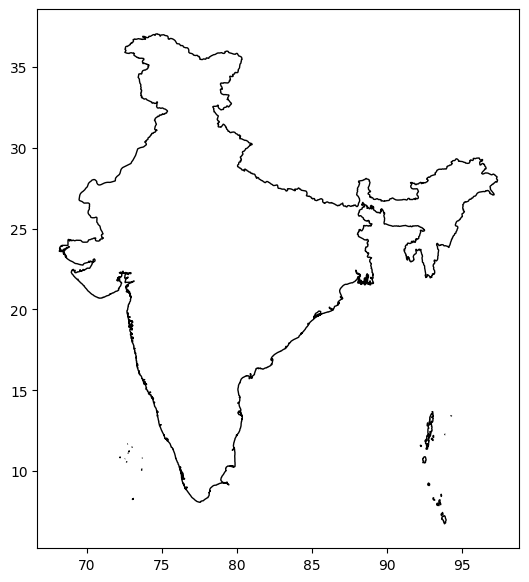

In [42]:
India_gdf=gdf[(gdf['SOVEREIGNT']=='India')&(gdf['TYPE'] != 'Dependency')]
fig,ax=plt.subplots(1,1)
fig.set_size_inches(15,7)
India_gdf.plot(ax=ax, facecolor='None',edgecolor='black')
plt.show()

We read the river network data from HydroRivers. We specify the mask parameter which clips the layer to the country boundary while reading the data.

This step can take a few minutes depending on the size of the country.

In [43]:
rivers_file=os.path.join(data_folder_path,hydrorivers_file)
rivers_file

'/content/drive/MyDrive/Jobs_Projects_Doc/Spatial_Analysis_Python/data/Color_RiverBasin_Map/hydrorivers_100.gpkg'

In [44]:
rivers_gdf=gpd.read_file(rivers_file)
rivers_gdf

,HYRIV_ID,NEXT_DOWN,MAIN_RIV,LENGTH_KM,DIST_DN_KM,DIST_UP_KM,CATCH_SKM,UPLAND_SKM,ENDORHEIC,DIS_AV_CMS,ORD_STRA,ORD_CLAS,ORD_FLOW,HYBAS_L12,geometry
0,10000016,10000021,10000030,2.29,27.7,57.4,5.98,414.6,0,4.556,2,1,6,1121660570,"MULTILINESTRING ((9.50625 37.19792, 9.51458 37..."
1,10000019,10000016,10000030,0.46,29.8,55.3,1.03,390.5,0,4.428,2,1,6,1121660570,"MULTILINESTRING ((9.50625 37.19375, 9.50625 37..."
2,10000021,10000024,10000030,11.54,16.0,69.1,42.91,468.3,0,4.704,2,1,6,1120082620,"MULTILINESTRING ((9.52708 37.20625, 9.53125 37..."
3,10000024,10000028,10000030,0.96,15.1,70.0,1.88,528.5,0,5.029,2,1,6,1120082620,"MULTILINESTRING ((9.62708 37.18125, 9.63125 37..."
4,10000027,0,10000027,1.92,0.0,15.5,5.82,105.5,0,0.464,2,1,7,1120031240,"MULTILINESTRING ((9.94375 37.17708, 9.93958 37..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2597246,90136542,90136553,90136552,3.33,1.7,29.9,11.93,140.9,0,10.482,3,1,5,9120007060,"MULTILINESTRING ((-44.65625 60.27708, -44.6604..."
2597247,90136543,90136524,90136552,3.10,6.6,25.1,10.54,110.1,0,7.855,3,1,6,9120007060,"MULTILINESTRING ((-44.58125 60.26875, -44.5895..."
2597248,90136552,0,90136552,0.98,0.0,31.4,1.70,160.1,0,11.853,3,1,5,9120007060,"MULTILINESTRING ((-44.71458 60.26458, -44.7229..."
2597249,90136553,90136552,90136552,0.75,1.2,30.5,0.74,145.5,0,10.848,3,1,5,9120007060,"MULTILINESTRING ((-44.70625 60.26875, -44.7104..."


<Axes: >

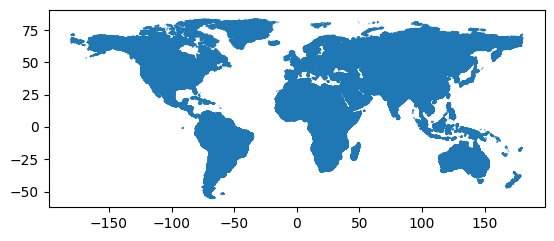

In [45]:
rivers_gdf.plot()

Mask India to retrive rivers in India

In [46]:
India_rivers_gdf=gpd.read_file(rivers_file,mask=India_gdf)
India_rivers_gdf

,HYRIV_ID,NEXT_DOWN,MAIN_RIV,LENGTH_KM,DIST_DN_KM,DIST_UP_KM,CATCH_SKM,UPLAND_SKM,ENDORHEIC,DIS_AV_CMS,ORD_STRA,ORD_CLAS,ORD_FLOW,HYBAS_L12,geometry
0,41128052,41129638,41134791,1.85,24.7,34.1,3.98,490.4,0,1.238,3,2,6,4121540480,"MULTILINESTRING ((69.48125 22.00625, 69.48125 ..."
1,41128050,41128391,41128391,3.05,1.4,24.8,12.34,128.5,0,0.420,2,1,7,4120032490,"MULTILINESTRING ((69.22292 22.00625, 69.21875 ..."
2,41127327,41128052,41134791,0.46,26.6,32.3,0.40,472.3,0,1.229,3,2,6,4121540480,"MULTILINESTRING ((69.48125 22.01042, 69.48125 ..."
3,41127141,41127327,41134791,4.63,27.0,31.8,18.90,446.3,0,1.145,3,2,6,4121540480,"MULTILINESTRING ((69.48125 22.05208, 69.48125 ..."
4,41125252,41127141,41134791,1.39,31.7,27.2,1.99,305.4,0,0.874,3,2,7,4121539560,"MULTILINESTRING ((69.48125 22.06458, 69.48125 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74212,40717917,40718479,41067217,0.61,1521.7,19.9,0.75,105.2,0,4.378,3,4,6,4120789890,"MULTILINESTRING ((96.35625 29.25625, 96.35208 ..."
74213,40717702,40718287,41067217,0.61,1522.3,43.9,0.38,687.4,0,27.885,4,3,5,4120789880,"MULTILINESTRING ((96.31875 29.26042, 96.32292 ..."
74214,40717480,40717702,41067217,0.46,1522.7,43.4,0.38,669.9,0,27.102,4,3,5,4120789880,"MULTILINESTRING ((96.31875 29.26458, 96.31875 ..."
74215,40717278,40717480,41067217,0.61,1523.4,42.8,2.81,666.4,0,27.030,4,3,5,4120789880,"MULTILINESTRING ((96.31458 29.26875, 96.31875 ..."


#Plot rivers in India

<Axes: >

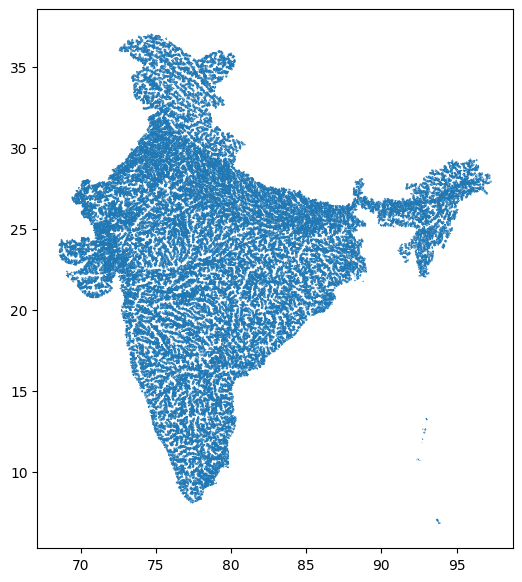

In [48]:
India_rivers_gdf.plot(figsize=(15,7))

#Visualize the river network.
Lets plot both India_gdf and India_river_gdf

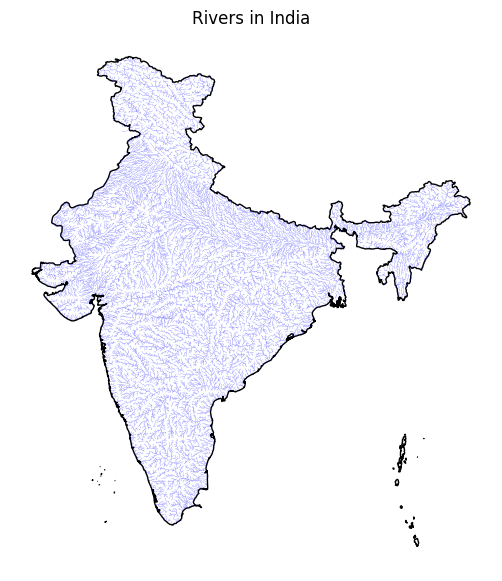

In [58]:
fig,ax=plt.subplots(1,1)
fig.set_size_inches(15,7)
India_gdf.plot(ax=ax, facecolor='None', edgecolor='black')
India_rivers_gdf.plot(ax=ax, color='blue', linewidth=0.1)
ax.set_title(f'Rivers in {selected_country}')
ax.set_facecolor("yellow")
ax.set_axis_off()

plt.show()

We want to style the rivers so that the width of the line is proportional to the value in the UPLAND_SKM attribute. We add a new column width to the GeoDataFrame by scaling the input values to a range of target widths.

Tip: These values will play an important role in your final visualization. Adjust these to suit the range of values for your country.

In [59]:
India_rivers_gdf['UPLAND_SKM'].describe()

,UPLAND_SKM
count,74217.000000
mean,10837.564722
std,53930.855887
min,100.100000
25%,198.000000
50%,494.800000
75%,2026.900000
max,942748.900000


In [64]:
# UPLAND_SKM:upstream catchment area for rivers in square kilometers (SKM).
original_min=int(np.min(India_rivers_gdf['UPLAND_SKM']))
original_max=int(np.max(India_rivers_gdf['UPLAND_SKM']))
##print('original_min:',original_min)
#print('original_max:',original_max)
target_min = 0.2
target_max = 0.9
#Normalizing the UPLAND_SKM #Here, each value in the UPLAND_SKM column is transformed to fit within the range [0, 1].
scaled = (India_rivers_gdf['UPLAND_SKM'] - original_min) / (original_max - original_min) #range(0,1)
#scaled.clip(0, 1): The .clip(0, 1) ensures that any values outside the range [0, 1] are capped at 0 (minimum) or 1 (maximum). #This prevents any values that were originally below original_min or above original_max from falling outside the normalized range.
#scaled * (target_max - target_min) + target_min: This transforms the scaled values (now in the range [0, 1]) to the desired target range of [0.2, 0.9]:
India_rivers_gdf['width'] = scaled.clip(0, 1) * (target_max - target_min) + target_min #range(0.2,0.9)
river_gdf_final = India_rivers_gdf.sort_values(['UPLAND_SKM', 'width'])[
    ['MAIN_RIV', 'UPLAND_SKM', 'width', 'geometry']]
river_gdf_final

original_min: 100
original_max: 942748


,MAIN_RIV,UPLAND_SKM,width,geometry
1321,41148808,100.1,0.200000,"MULTILINESTRING ((70.97083 21.68333, 70.96458 ..."
2229,40795889,100.1,0.200000,"MULTILINESTRING ((71.66042 27.60208, 71.66458 ..."
6340,41067217,100.1,0.200000,"MULTILINESTRING ((80.60208 24.20208, 80.60625 ..."
8057,41067217,100.1,0.200000,"MULTILINESTRING ((79.34375 24.66458, 79.34375 ..."
11270,41067217,100.1,0.200000,"MULTILINESTRING ((80.56042 27.75208, 80.56042 ..."
...,...,...,...,...
59812,41067217,942435.1,0.899768,"MULTILINESTRING ((88.71042 24.31042, 88.71458 ..."
59829,41067217,942452.4,0.899780,"MULTILINESTRING ((88.73958 24.24375, 88.73958 ..."
59826,41067217,942477.6,0.899799,"MULTILINESTRING ((88.73958 24.23958, 88.73958 ..."
59828,41067217,942487.9,0.899807,"MULTILINESTRING ((88.73958 24.22292, 88.73958 ..."


Your task is to take the `river_gdf_final` GeoDataFrame and render the river network by applying the following styling guidelines. Refer to the [`geopandas.GeoDataFrame.plot()`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html) documentation for parameter values and options.

* Assign a color to each river segment based on the value of `MAIN_RIV` column. *Hint: set `categorical=True`*.
* Assign width to each item based on the value in the `width` column.
* Set the map background to black.
* Set the title to white and change the font to be larger.

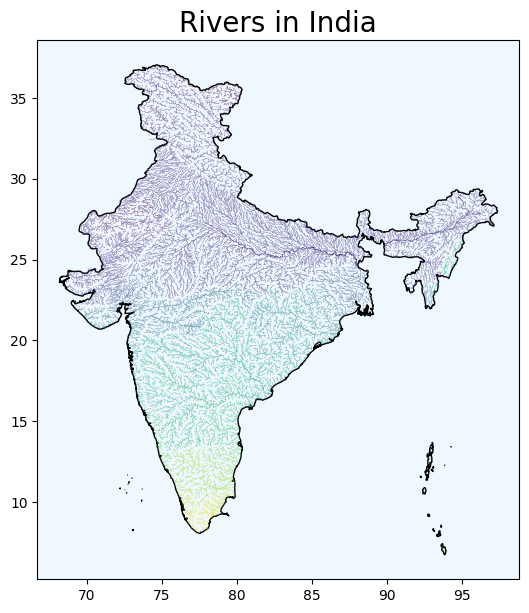

In [83]:
fig,ax=plt.subplots(1,1)
# Set the background color
#ax.set_facecolor('black')  # Light blue #F0F8FF
ax.set_facecolor('#F0F8FF')
fig.set_size_inches(15,7)
India_gdf.plot(ax=ax, facecolor='None', edgecolor='black')
river_gdf_final.plot(ax=ax, column='MAIN_RIV',cmap='viridis',categorical=True, linewidth=river_gdf_final['width'])
ax.set_title(f'Rivers in {selected_country}',fontsize=20)

#ax.set_axis_off()

plt.show()

In [110]:
river_gdf_final['width']

,width
1321,0.200000
2229,0.200000
6340,0.200000
8057,0.200000
11270,0.200000
...,...
59812,0.899768
59829,0.899780
59826,0.899799
59828,0.899807


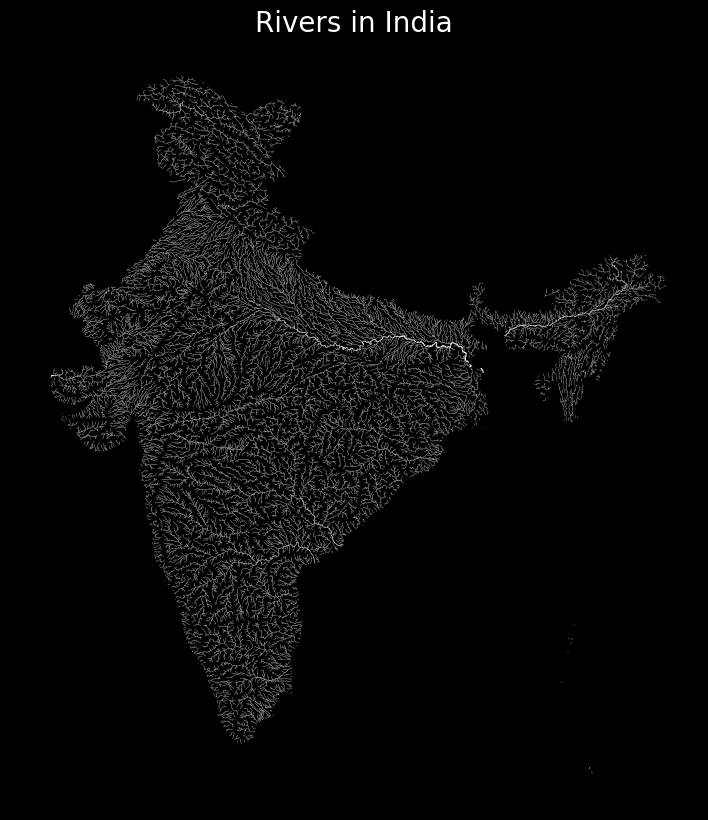

In [99]:
fig,ax=plt.subplots(1,1, figsize=(15,7))
# Set the background color
fig.patch.set_facecolor('black') # Set figure background to black
#ax.set_facecolor('black')  # Light blue #F0F8FF
ax.set_facecolor('#F0F8FF')  # Set axes background to black
fig.set_size_inches(25,10)
India_gdf.plot(ax=ax, facecolor='None', edgecolor='black')
river_gdf_final.plot(ax=ax, column='MAIN_RIV',cmap='Spectral_r',categorical=True, linewidth=river_gdf_final['width'],edgecolor='white') #cmap='brg','hsv','RdYlBu','rainbow'
ax.set_title(f'Rivers in {selected_country}',fontsize=20, fontweight=10,color='white')
ax.set_axis_off()

plt.show()

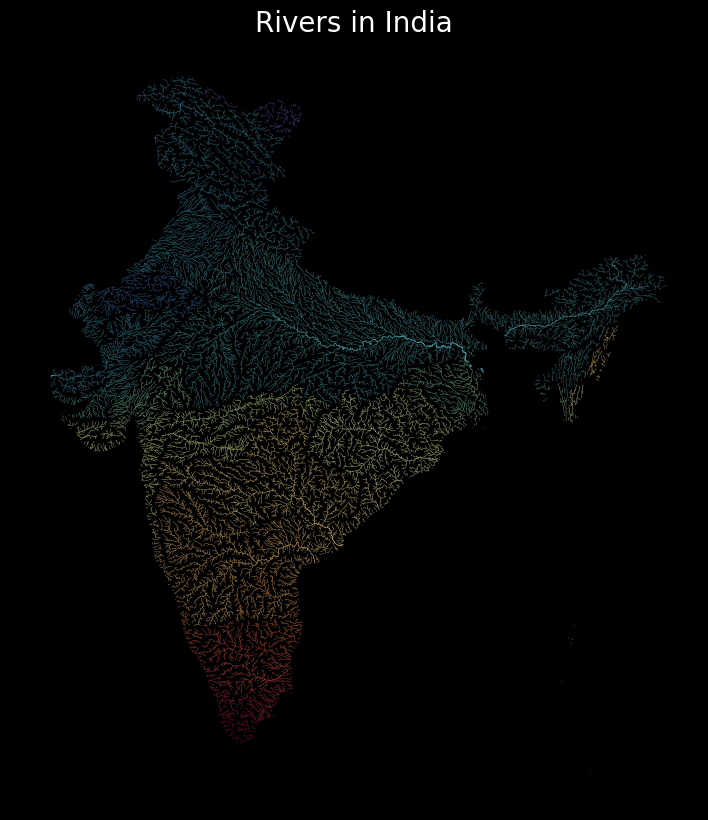

In [100]:
fig,ax=plt.subplots(1,1, figsize=(15,7))
# Set the background color
fig.patch.set_facecolor('black') # Set figure background to black
#ax.set_facecolor('black')  # Light blue #F0F8FF
ax.set_facecolor('#F0F8FF')  # Set axes background to black
fig.set_size_inches(25,10)
India_gdf.plot(ax=ax, facecolor='None', edgecolor='black')
river_gdf_final.plot(ax=ax, column='MAIN_RIV',cmap='Spectral_r',categorical=True, linewidth=river_gdf_final['width']) #cmap='brg','hsv','RdYlBu','rainbow'
ax.set_title(f'Rivers in {selected_country}',fontsize=20, fontweight=10,color='white')
ax.set_axis_off()

plt.show()

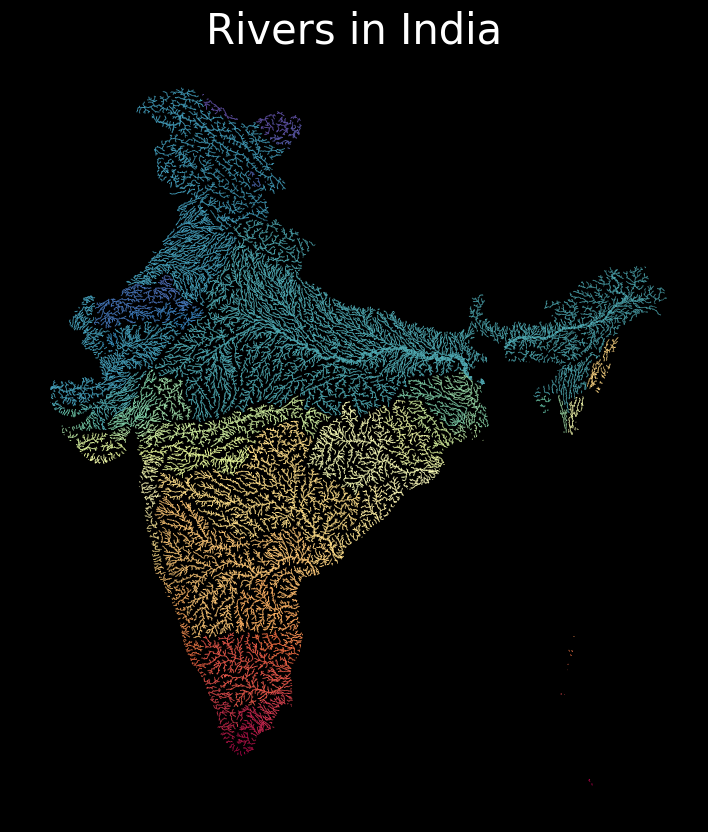

In [108]:
fig,ax=plt.subplots(1,1, figsize=(15,7))
# Set the background color
fig.patch.set_facecolor('black') # Set figure background to black
#ax.set_facecolor('black')  # Light blue #F0F8FF
ax.set_facecolor('#F0F8FF')  # Set axes background to black
fig.set_size_inches(25,10)
India_gdf.plot(ax=ax, facecolor='None', edgecolor='black')
river_gdf_final.plot(ax=ax, column='MAIN_RIV',cmap='Spectral_r',categorical=True, linewidth=river_gdf_final['width']*3) #cmap='brg','hsv','RdYlBu','rainbow'
ax.set_title(f'Rivers in {selected_country}',fontsize=30, color='white')
ax.set_axis_off()

plt.show()

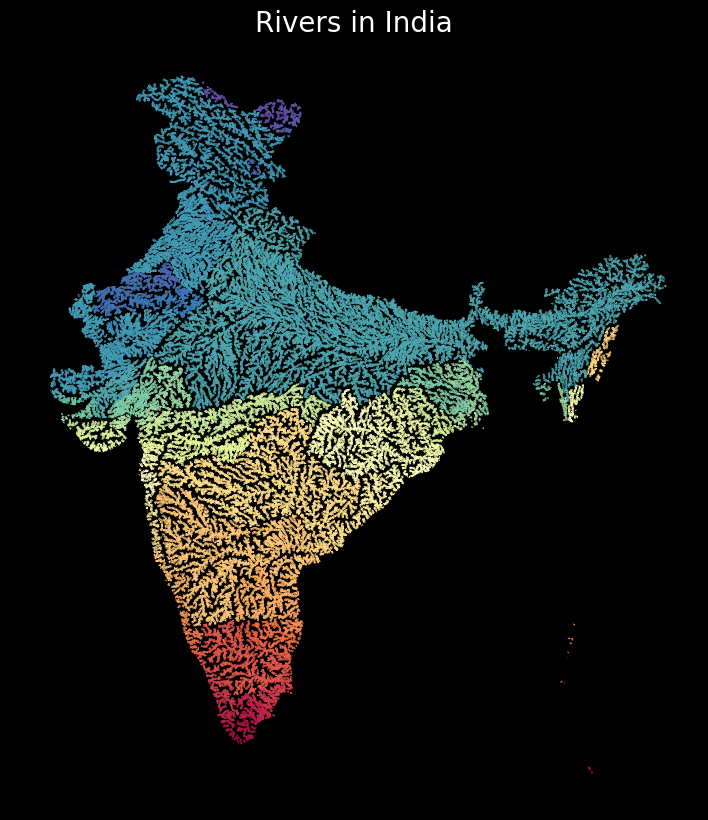

In [101]:
fig,ax=plt.subplots(1,1, figsize=(15,7))
# Set the background color
fig.patch.set_facecolor('black') # Set figure background to black
#ax.set_facecolor('black')  # Light blue #F0F8FF
ax.set_facecolor('#F0F8FF')  # Set axes background to black
fig.set_size_inches(25,10)
India_gdf.plot(ax=ax, facecolor='None', edgecolor='black')
river_gdf_final.plot(ax=ax, column='MAIN_RIV',cmap='Spectral_r',categorical=True) #cmap='brg','hsv','RdYlBu','rainbow'
ax.set_title(f'Rivers in {selected_country}',fontsize=20, fontweight=10,color='white')
ax.set_axis_off()

plt.show()

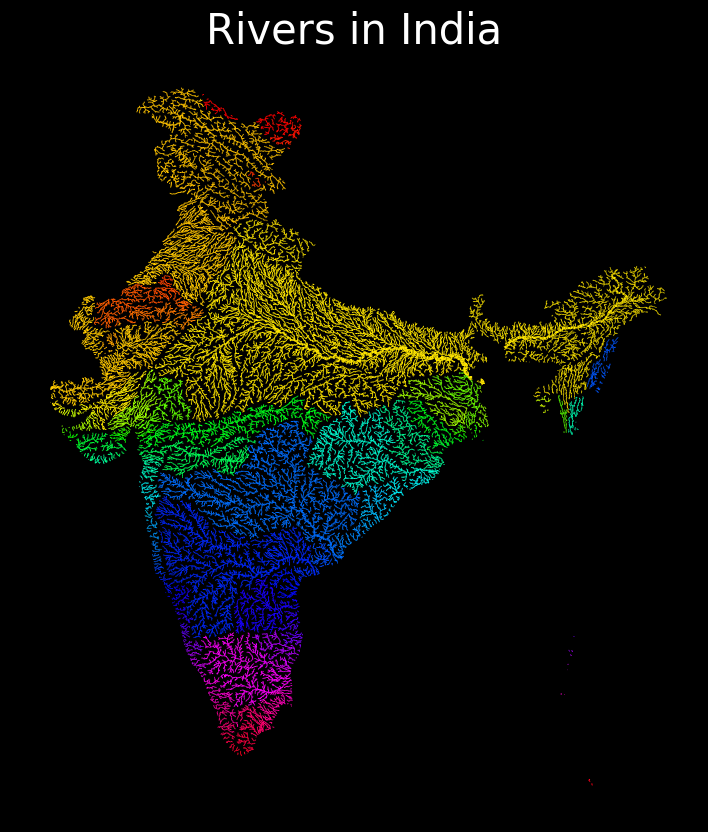

In [109]:
fig,ax=plt.subplots(1,1, figsize=(15,7))
# Set the background color
fig.patch.set_facecolor('black') # Set figure background to black
#ax.set_facecolor('black')  # Light blue #F0F8FF
ax.set_facecolor('#F0F8FF')  # Set axes background to black
fig.set_size_inches(25,10)
India_gdf.plot(ax=ax, facecolor='None', edgecolor='black')
river_gdf_final.plot(ax=ax, column='MAIN_RIV',cmap='hsv',categorical=True, linewidth=river_gdf_final['width']*3) #cmap='brg','hsv','RdYlBu','rainbow'
ax.set_title(f'Rivers in {selected_country}',fontsize=30, color='white')
ax.set_axis_off()

plt.show()